# Assignment 2_1: Digital Marketing Math Part2

###Perform Data Analysis on dataset "adbanners.csv"

####Dataset: Provided by Professor [Ivan Fedorenko](https://www.csueastbay.edu/directory/profiles/mktg/fedorenkoivan.html) | Digital Media Analytics - California State University, East Bay



##Tasks:

* Your company has been testing three types of context ad banners designs: A, B and C.
* Given similar targeting, placements and costs, assess which banner in the attached dataset has performed better
* Identify the three top performing Ad banners.

#Libraries, Data, Directory

In [ ]:
# Set-up Directory
%cd /content/drive/MyDrive/Assignments/Digital Media Analytics/Ad Hoc

/content/drive/MyDrive/Assignments/Digital Media Analytics/Ad Hoc


In [ ]:
#Install needed libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the data
banner_df = pd.read_csv('adbanners.csv')
banner_df.head()

,Unnamed: 0,date,banner,impressions,clicks,leads,revenue
0,0,3/3/2025,adA,3309,22,1,13.47
1,1,3/3/2025,adB,2285,25,1,17.35
2,2,3/3/2025,adC,2178,27,1,12.56
3,3,3/4/2025,adA,2476,20,1,13.19
4,4,3/4/2025,adB,3330,35,1,14.70


In [ ]:
# Convert date column to datetime format
banner_df['date'] = pd.to_datetime(banner_df['date'])

# Aggregate data by banner type
banner_performance = banner_df.groupby('banner').agg(
    total_impressions=('impressions', 'sum'),
    total_clicks=('clicks', 'sum'),
    total_leads=('leads', 'sum'),
    total_revenue=('revenue', 'sum')
)

# Calculating additional metrics
banner_performance['CTR'] = banner_performance['total_clicks'] / banner_performance['total_impressions'] * 100  # Click-Through Rate (%)
banner_performance['Conversion Rate'] = banner_performance['total_leads'] / banner_performance['total_clicks'] * 100  # Leads per Click (%)
banner_performance['Revenue per Impression'] = banner_performance['total_revenue'] / banner_performance['total_impressions']  # Revenue per Impression ($)


In [ ]:
banner_performance.head()

,total_impressions,total_clicks,total_leads,total_revenue,CTR,Conversion Rate,Revenue per Impression
banner,,,,,,,
adA,29499,231,10,144.83,0.783077,4.329004,0.004910
adB,32052,294,12,183.51,0.917259,4.081633,0.005725
adC,27575,329,13,191.36,1.193110,3.951368,0.006940


**Ad banner C** outperformed the others with the highest Click-Through Rate (**1.19%**) and Revenue per Impression (**$0.0069**), indicating strong engagement and monetization. **Banner B** followed closely, showing a balanced performance across all metrics, particularly in total revenue. **Banner A**, while having the lowest metrics overall, still delivered consistent results with a solid conversion rate of **4.33%**.









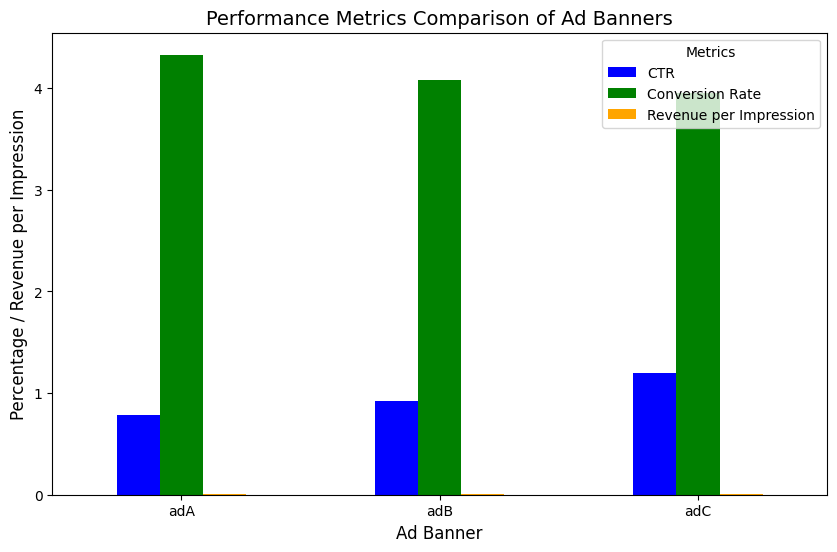

In [ ]:
# Bar chart for key performance metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Define the metrics to plot
metrics = ['CTR', 'Conversion Rate', 'Revenue per Impression']
colors = ['blue', 'green', 'orange']

# Plot bars for each metric
banner_performance[metrics].plot(kind='bar', color=colors, ax=ax)

# Labels and title
ax.set_title("Performance Metrics Comparison of Ad Banners", fontsize=14)
ax.set_ylabel("Percentage / Revenue per Impression", fontsize=12)
ax.set_xlabel("Ad Banner", fontsize=12)
ax.legend(title="Metrics")

# Display the plot
plt.xticks(rotation=0)
plt.show()

